# Project 2: In-Depth Analysis of Human Text vs AI Text

Author: Quan Nguyen

2/27/2024

## Introduction and Problem
- This is the continuation of the previous Project 1, where I did a simple analysis of the Human Text vs AI Text.
- The project will be implemented in Python this time and will include a simple regression model that trained to rate the robustness of the Human Text vs AI Text.

## Loading the Libraries and Data Set

In [36]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

## Details of Data Set
#### The same case as before, since the initial data set is too large, I will only include the first 100 samples from each type of texts

In [37]:
df = pd.read_csv("AI_Human.csv")

human_df = df[df['generated'] == 0].head(100)
ai_df = df[df['generated'] == 1].head(100)
human_text = human_df['text'].tolist()
ai_text = ai_df['text'].tolist()

print("Number of human texts:", len(human_text))
print("Number of AI texts:", len(ai_text))

nltk.download('punkt', quiet = True)
nltk.download('stopwords', quiet = True)

all_texts = human_text + ai_text
labels = ['Human'] * len(human_text) + ['AI'] * len(ai_text)

Number of human texts: 100
Number of AI texts: 100


## Pre-Processing of Data Set (Tokenization)
- Utilizing Natural Language Toolkit Library(nltk), I was able to skip a large number of steps involving eliminating stop words, punctuations, etc. that do not contribute to the meaning of the text
- nltk Library uses the same method as in Corpus in R so there was not much of a learning curve involved.

In [38]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    processed_text = ' '.join(filtered_tokens)
    return processed_text

preprocessed_texts = [preprocess_text(text) for text in all_texts]
print("First preprocessed text: ", preprocessed_texts[0])

First preprocessed text:  cars cars around since became famous henry ford created built first modelt cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing like matter article german suburb life goes without cars elizabeth rosenthal states automobiles linchpin suburbs middle class families either shanghai chicago tend make homes experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe passenger cars responsible percent greenhouse gas emissions europeand percent carintensive areas united states cars main reason greenhouse gas emissions lot people driving around time getting need go article paris bans driving due smog robert duffer says paris days nearrecord pollution enforced partial driving ban clear air global city also says monday motorist evennumbered license plates ordered leave cars home fined euro fine order would applied oddnumbered plates following day cars reason p

## Feature Extraction Methods and Difference Machine Learning Models
### Next, this is byfar the most important step in the implementation of my project, which includes:
- Testing and comparing the performance of different existing machine learning models: Logistic Regression, Decision Tree, and Naive Bayes to see which one is the best in predicting the generated text.
-Performed training the model using train_test_split from sklearn library, which ask for the user the percent of the samples will be used towards training and the rest will be for testing.
-In the same method, I also want to see the importance of splitting the data into training and testing so I set different parameters for the test sizes.
-Below is a visualization of the results of training the model where I set the range to be from 0.5 to 1 because upon examning the models, all three of them are over 70% accurate on the testing.

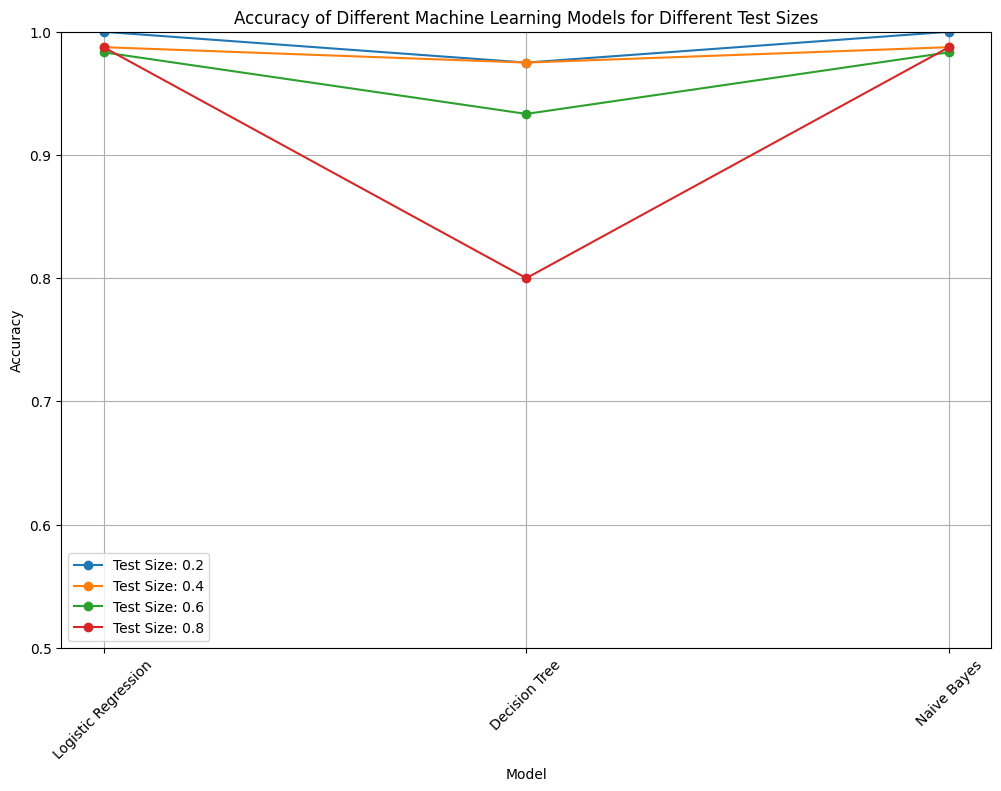

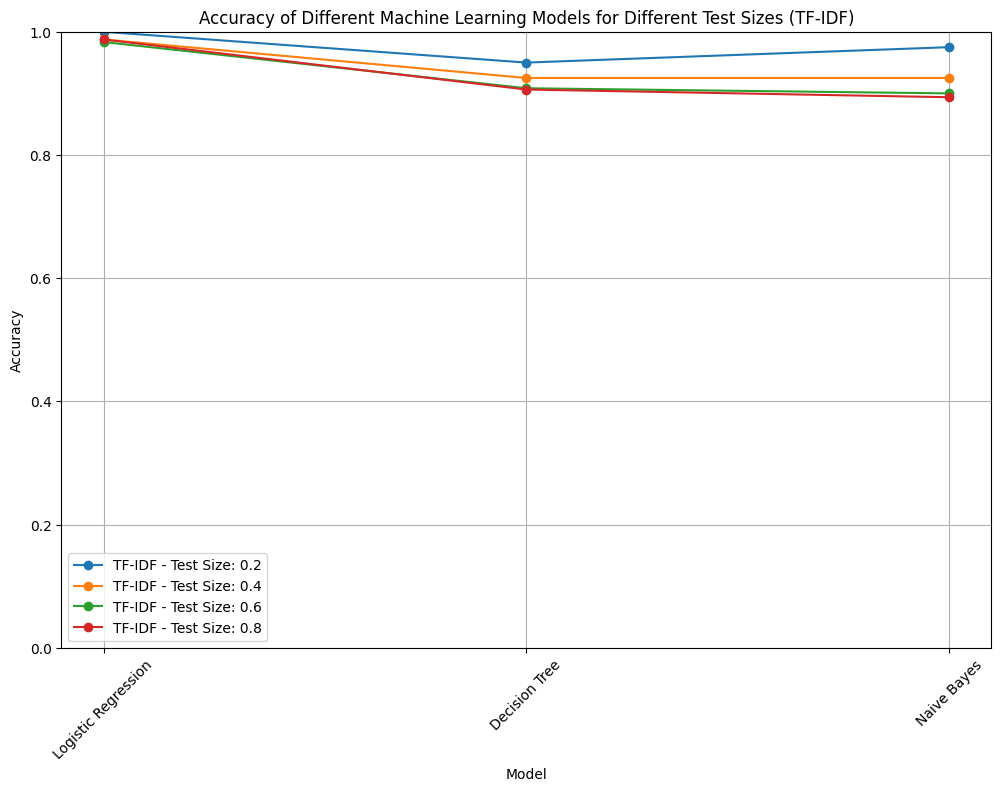

In [39]:
test_sizes = [0.2, 0.4, 0.6, 0.8]
accuracies = {test_size: {} for test_size in test_sizes}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(preprocessed_texts, labels, test_size=test_size, random_state=42)
    
    bow_vectorizer = CountVectorizer()
    X_train_bow = bow_vectorizer.fit_transform(X_train)
    X_test_bow = bow_vectorizer.transform(X_test)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": MultinomialNB()
    }

    for name, model in models.items():
        model.fit(X_train_bow, y_train)
        y_pred = model.predict(X_test_bow)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[test_size][name] = accuracy

plt.figure(figsize=(12, 8))

for test_size, model_accuracies in accuracies.items():
    plt.plot(model_accuracies.keys(), model_accuracies.values(), marker='o', label=f"Test Size: {test_size}")

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models for Different Test Sizes')
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


test_sizes = [0.2, 0.4, 0.6, 0.8]

accuracies_tfidf = {test_size: {} for test_size in test_sizes}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(preprocessed_texts, labels, test_size=test_size, random_state=42)

    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": MultinomialNB()
    }

    for name, model in models.items():
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies_tfidf[test_size][name] = accuracy

plt.figure(figsize=(12, 8))

for test_size, model_accuracies in accuracies_tfidf.items():
    plt.plot(model_accuracies.keys(), model_accuracies.values(), marker='o', label=f"TF-IDF - Test Size: {test_size}")

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models for Different Test Sizes (TF-IDF)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Testing and Evaluating Future Problems
#### While the tool is trained with high accuracy, there are still many problems that require deeper training. The following example demonstrates one of the edge cases of the model, where the model, even though it has high AI probability, determined the text is Human Text due to the nature of the probabilistic classification approach. In this example, the model predicts the text has ~71%  chance of being AI text but the word "respect" is very common in human generated text so it could not be confident enough to override the decision.

In [40]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(all_texts)
lr_model_tfidf = LogisticRegression(max_iter=1000)
lr_model_tfidf.fit(X_tfidf, labels)

def predict_text_type(text):
   
    preprocessed_text = preprocess_text(text)
    X = tfidf_vectorizer.transform([preprocessed_text])
    prediction = lr_model_tfidf.predict(X)[0]
    probabilities = lr_model_tfidf.predict_proba(X)[0]
    max_coeff_index = X.indices[X.data.argmax()]
    features = tfidf_vectorizer.get_feature_names_out()
    max_coeff_word = features[max_coeff_index]
    
    print("Input text:")
    print(text)
    print("Predicted label:", prediction)
    print("Probability (AI):", probabilities[1])
    print("Reason for prediction:")
    print(f"The presence of the word '{max_coeff_word}' contributes most to the prediction.")
    print()
ai_text = "It's essential to approach discussions about any group of people with sensitivity and recognition of the vast diversity within that group. When speaking about \"Asian people,\" it's crucial to acknowledge the immense cultural, ethnic, linguistic, and historical variations encompassed by the term. Asia is the largest and most populous continent, comprising numerous countries such as China, India, Japan, South Korea, Vietnam, and many others, each with its distinct traditions, beliefs, and customs. Asian people have contributed significantly to various fields like art, science, philosophy, and technology throughout history. They exhibit a rich tapestry of languages, including Mandarin, Hindi, Bengali, Japanese, Korean, and many more, reflecting centuries of cultural evolution. Asian cuisine is renowned worldwide for its diversity, flavors, and culinary techniques, ranging from spicy curries in South Asia to delicate sushi in Japan. Moreover, Asians have a profound respect for family and community, often placing great emphasis on filial piety and collective well-being. Traditional values such as humility, perseverance, and respect for authority continue to influence many Asian societies, alongside rapid modernization and globalization. However, it's essential to recognize that generalizations about Asian people can be reductive and misleading, as individuals within this vast demographic encompass a wide spectrum of experiences, beliefs, and identities. Therefore, fostering understanding and appreciation for the complexities and nuances within Asian cultures is crucial in promoting inclusivity and combating stereotypes."
predict_text_type(ai_text)

Input text:
It's essential to approach discussions about any group of people with sensitivity and recognition of the vast diversity within that group. When speaking about "Asian people," it's crucial to acknowledge the immense cultural, ethnic, linguistic, and historical variations encompassed by the term. Asia is the largest and most populous continent, comprising numerous countries such as China, India, Japan, South Korea, Vietnam, and many others, each with its distinct traditions, beliefs, and customs. Asian people have contributed significantly to various fields like art, science, philosophy, and technology throughout history. They exhibit a rich tapestry of languages, including Mandarin, Hindi, Bengali, Japanese, Korean, and many more, reflecting centuries of cultural evolution. Asian cuisine is renowned worldwide for its diversity, flavors, and culinary techniques, ranging from spicy curries in South Asia to delicate sushi in Japan. Moreover, Asians have a profound respect for f

## Conclusion
- The experiment demonstrates the effectiveness of logistic regression models trained on TF-IDF representations in classifying human-generated and AI-generated text, with consistent accuracy across different test sizes, showcasing its robustness.

- Despite achieving high accuracy rates, the probabilistic nature of the classification reveals the complexity of distinguishing between human and AI-generated text, emphasizing the need for nuanced interpretation and further exploration of feature importance.

- The project underscores the significance of employing natural language processing techniques, such as text preprocessing and machine learning algorithms, to address the evolving challenges of identifying AI-generated content in various contexts, contributing to advancements in content moderation and authenticity verification.

#### P/S: Try using my model to see if my conclusion was generated by AI or not!